# Business Case : Yulu - Hypothesis Testing

# Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

# Business Problem
The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import shapiro

In [ ]:
!pip install pandas_profiling

In [ ]:
from ydata_profiling import ProfileReport

Downloading the Yulu Dataset

In [3]:
! gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 6.69MB/s]


In [4]:
data=pd.read_csv("bike_sharing.csv?1642089089")
print("Data Set read successfully")


Data Set read successfully


In [5]:
df=data.copy()

Analysing basic metrics of the Yulu Dataset

In [ ]:
df.size

130632

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

First five rows of the Dataset

In [ ]:
df.tail()

datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

Last five rows of the dataset

In [ ]:
df.duplicated().sum()

0

Observed that there is no duplicate values in the dataset

# Data types of all the attributes

In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

The above information shows that there is No Null values in the Dataset.

# Statistical Information

In [ ]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [ ]:
df.describe(include=object)

datetime
count                 10886
unique                10886
top     2011-01-01 00:00:00
freq                      1

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

● season: season (1: spring, 2: summer, 3: fall, 4: winter)

In [6]:
def seasons_name(x):
  if x==1:
    return "spring"
  elif x==2:
    return "summer"
  elif x==3:
    return "fall"
  else:
    return "winter"

In [7]:
df['season']=df['season'].apply(seasons_name)

In [ ]:
df.sample(10)

datetime  season  holiday  workingday  weather   temp  \
7576   2012-05-15 01:00:00  summer        0           1        3  22.96   
5456   2012-01-02 11:00:00  spring        1           0        1  10.66   
10013  2012-11-02 14:00:00  winter        0           1        2  16.40   
2068   2011-05-13 02:00:00  summer        0           1        2  20.50   
6972   2012-04-08 20:00:00  summer        0           0        1  22.96   
40     2011-01-02 17:00:00  spring        0           0        1  13.94   
8028   2012-06-14 21:00:00  summer        0           1        1  26.24   
3194   2011-08-03 00:00:00    fall        0           1        2  32.80   
2860   2011-07-08 02:00:00    fall        0           1        2  28.70   
10526  2012-12-05 00:00:00  winter        0           1        1  20.50   

        atemp  humidity  windspeed  casual  registered  count  
7576   26.515        88     8.9981       5          14     19  
5456   10.605        35    32.9975      33         142    175  
10013  20.455        40    32.9975      63         199    262  
2068   24.240        88     8.9981       3           8     11  
6972   26.515        28    27.9993      65         146    211  
40     16.665        57    12.9980       7          58     65  
8028   30.305        65    11.0014      67         270    337  
3194   37.120        49    11.0014      11          32     43  
2860   33.335        74    11.0014      10          12     22  
10526  24.240        59    19.0012       6          31     37

In [8]:
df['season'].value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

* holiday : whether day is a holiday or not


In [9]:
def holiday_or_not(x):
  if x==0:
    return "No Holiday"
  else:
    return "Holiday"

In [10]:
df['holiday']=df['holiday'].apply(holiday_or_not)

In [ ]:
df['holiday'].value_counts()

holiday
No Holiday    10575
Holiday         311
Name: count, dtype: int64

In [11]:
def workingday_or_not(x):
  if x==0:
    return "No Working Day"
  else:
    return "Working Day"

In [12]:
df['workingday']=df['workingday'].apply(workingday_or_not)

In [ ]:
df['workingday'].value_counts()

workingday
Working Day       7412
No Working Day    3474
Name: count, dtype: int64

In [13]:
weather_mapping={1:"clear",2:"cloudy",3:"light rain",4:"heavy rain"}
df['weather']=df['weather'].map(weather_mapping)

In [ ]:
df.sample(10)

datetime  season     holiday      workingday     weather  \
8803   2012-08-09 04:00:00    fall  No Holiday     Working Day      cloudy   
7985   2012-06-13 02:00:00  summer  No Holiday     Working Day       clear   
7573   2012-05-14 22:00:00  summer  No Holiday     Working Day      cloudy   
9486   2012-09-18 15:00:00    fall  No Holiday     Working Day  light rain   
7703   2012-06-01 08:00:00  summer  No Holiday     Working Day      cloudy   
5400   2011-12-19 02:00:00  winter  No Holiday     Working Day       clear   
9058   2012-08-19 19:00:00    fall  No Holiday  No Working Day      cloudy   
8565   2012-07-18 06:00:00    fall  No Holiday     Working Day       clear   
2372   2011-06-06 18:00:00  summer  No Holiday     Working Day       clear   
10368  2012-11-17 10:00:00  winter  No Holiday  No Working Day       clear   

        temp   atemp  humidity  windspeed  casual  registered  count  
8803   27.88  31.820        89     8.9981       0          10     10  
7985   25.42  28.790        83     8.9981       0           4      4  
7573   23.78  27.275        78     6.0032      11         118    129  
9486   24.60  27.275        88    16.9979       1          35     36  
7703   26.24  28.790        89    12.9980      19         675    694  
5400    7.38  10.605        80     6.0032       0           3      3  
9058   26.24  30.305        73     8.9981      72         269    341  
8565   29.52  34.090        70    11.0014      10         152    162  
2372   31.16  33.335        31     8.9981      56         500    556  
10368  14.76  16.665        46    16.9979      62         258    320

In [14]:
df['weather'].value_counts()

weather
clear         7192
cloudy        2834
light rain     859
heavy rain       1
Name: count, dtype: int64

In [ ]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [17]:
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
df.describe()

datetime         temp         atemp      humidity  \
count                          10886  10886.00000  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968     20.23086     23.655084     61.886460   
min              2011-01-01 00:00:00      0.82000      0.760000      0.000000   
25%              2011-07-02 07:15:00     13.94000     16.665000     47.000000   
50%              2012-01-01 20:30:00     20.50000     24.240000     62.000000   
75%              2012-07-01 12:45:00     26.24000     31.060000     77.000000   
max              2012-12-19 23:00:00     41.00000     45.455000    100.000000   
std                              NaN      7.79159      8.474601     19.245033   

          windspeed        casual    registered         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      12.799395     36.021955    155.552177    191.574132  
min        0.000000      0.000000      0.000000      1.000000  
25%        7.001500      4.000000     36.000000     42.000000  
50%       12.998000     17.000000    118.000000    145.000000  
75%       16.997900     49.000000    222.000000    284.000000  
max       56.996900    367.000000    886.000000    977.000000  
std        8.164537     49.960477    151.039033    181.144454

# Statistical Summary

The dataset comprises 10,886 observations of bike rental data. Key statistical metrics for various attributes are summarized as follows:

* datetime: The observations span from January 1, 2011, to December 19, 2012. The median datetime is January 1, 2012, at 20:30, and the mean datetime is December 27, 2011, at 05:56:22.
* temp: The temperature ranges from 0.82°C to 41.00°C, with a mean of 20.23°C and a standard deviation of 7.79°C. The median temperature is 20.50°C.
* atemp: The "feels like" temperature ranges from 0.76°C to 45.45°C, with a mean of 23.66°C and a standard deviation of 8.47°C. The median "feels like" temperature is 24.24°C.
* humidity: Humidity levels range from 0% to 100%, with a mean of 61.89% and a standard deviation of 19.25%. The median humidity is 62%.
* windspeed: Wind speeds vary from 0 to 56.997 km/h, with a mean of 12.80 km/h and a standard deviation of 8.16 km/h. The median windspeed is 13.00 km/h.
* casual: The number of casual users ranges from 0 to 367, with a mean of 36.02 and a standard deviation of 49.96. The median number of casual users is 17.
* registered: The number of registered users ranges from 0 to 886, with a mean of 155.55 and a standard deviation of 151.04. The median number of registered users is 118.
* count: The total bike rentals per hour range from 1 to 977, with a mean of 191.57 and a standard deviation of 181.14. The median total bike rentals per hour is 145.

In [ ]:
df.describe(include=object)

season     holiday   workingday weather
count    10886       10886        10886   10886
unique       4           2            2       4
top     winter  No Holiday  Working Day   clear
freq      2734       10575         7412    7192

The dataset comprises 10,886 entries and includes four categorical variables: season, holiday, working day, and weather.
* The 'season' variable has four unique categories, with 'winter' being the most frequent, occurring 2,734 times.
* The 'holiday' variable is divided into two categories, with 'No Holiday' being the predominant category, appearing 10,575 times.
* Similarly, the 'working day' variable also has two categories, with 'Working Day' being the most common, recorded 7,412 times.
* Lastly, the 'weather' variable includes four unique categories, with 'clear' conditions being the most frequent, observed 7,192 times.

<Axes: xlabel='count', ylabel='Count'>

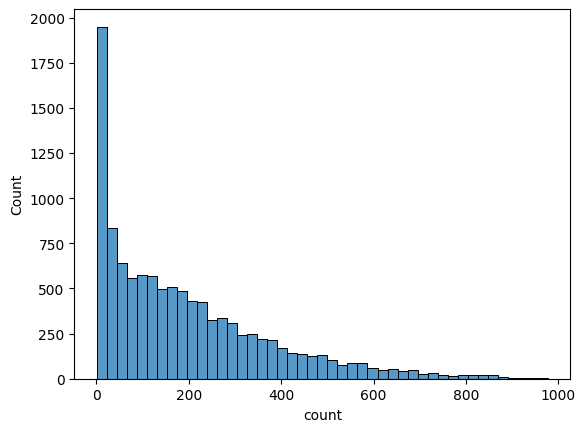

In [ ]:
sns.histplot(df['count'])

In [ ]:
df.head(2)

datetime  season     holiday      workingday weather  temp  \
0 2011-01-01 00:00:00  spring  No Holiday  No Working Day   clear  9.84   
1 2011-01-01 01:00:00  spring  No Holiday  No Working Day   clear  9.02   

    atemp  humidity  windspeed  casual  registered  count  
0  14.395        81        0.0       3          13     16  
1  13.635        80        0.0       8          32     40

<Axes: xlabel='weather', ylabel='count'>

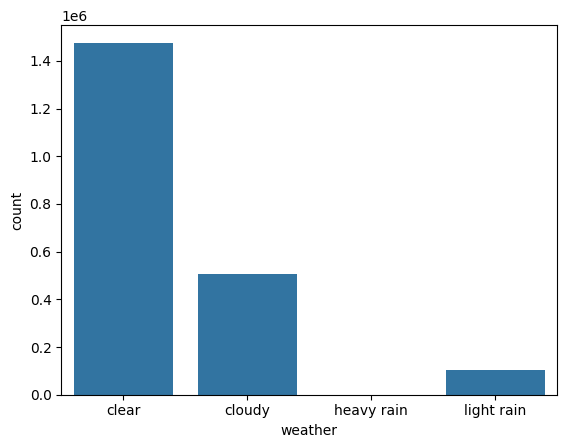

In [ ]:
weather_counts= df.groupby('weather')['count'].sum().reset_index()

sns.barplot(x='weather',y='count',data=weather_counts)

Observation:

Data shows that bicycle rentals are higher when the weather is clear.

<Axes: xlabel='season', ylabel='count'>

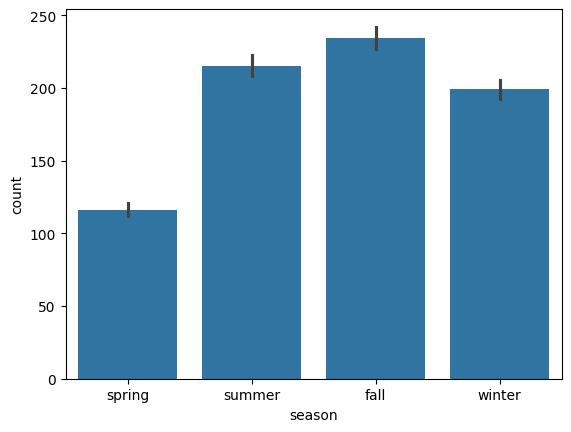

In [ ]:
season_counts= df.groupby('season')['count'].sum().reset_index()

sns.barplot(x='season',y='count', data=df)

Observation:

Data shows that bicycle rentals are higher when the season is fall.

In [ ]:
holiday_counts= df.groupby('holiday')['count'].sum().reset_index()

holiday_counts

holiday    count
0     Holiday    57808
1  No Holiday  2027668

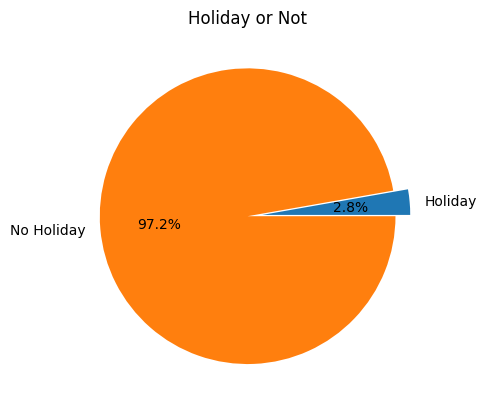

In [ ]:
plt.pie(data=holiday_counts,x=holiday_counts['count'],labels=holiday_counts['holiday'],autopct='%1.1f%%',explode=[0.1,0])
plt.title("Holiday or Not")
plt.show()

Observation:

In this dataset, about 97.2% of the days are non-holidays, and these days have higher bicycle rental counts

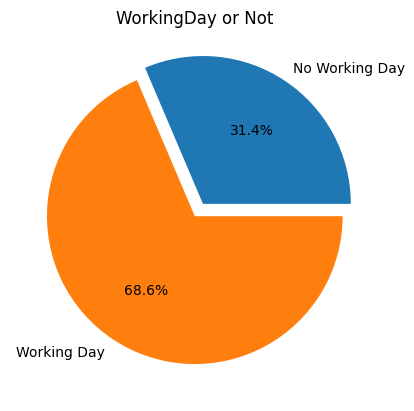

In [ ]:
workingday_counts= df.groupby('workingday')['count'].sum().reset_index()

plt.pie(data=workingday_counts,x=workingday_counts['count'],labels=workingday_counts['workingday'],autopct='%1.1f%%',explode=[0.1,0])
plt.title("WorkingDay or Not")
plt.show()

Observation:

In this dataset, about 68.6% of the days are working Days, and these days have higher bicycle rental counts

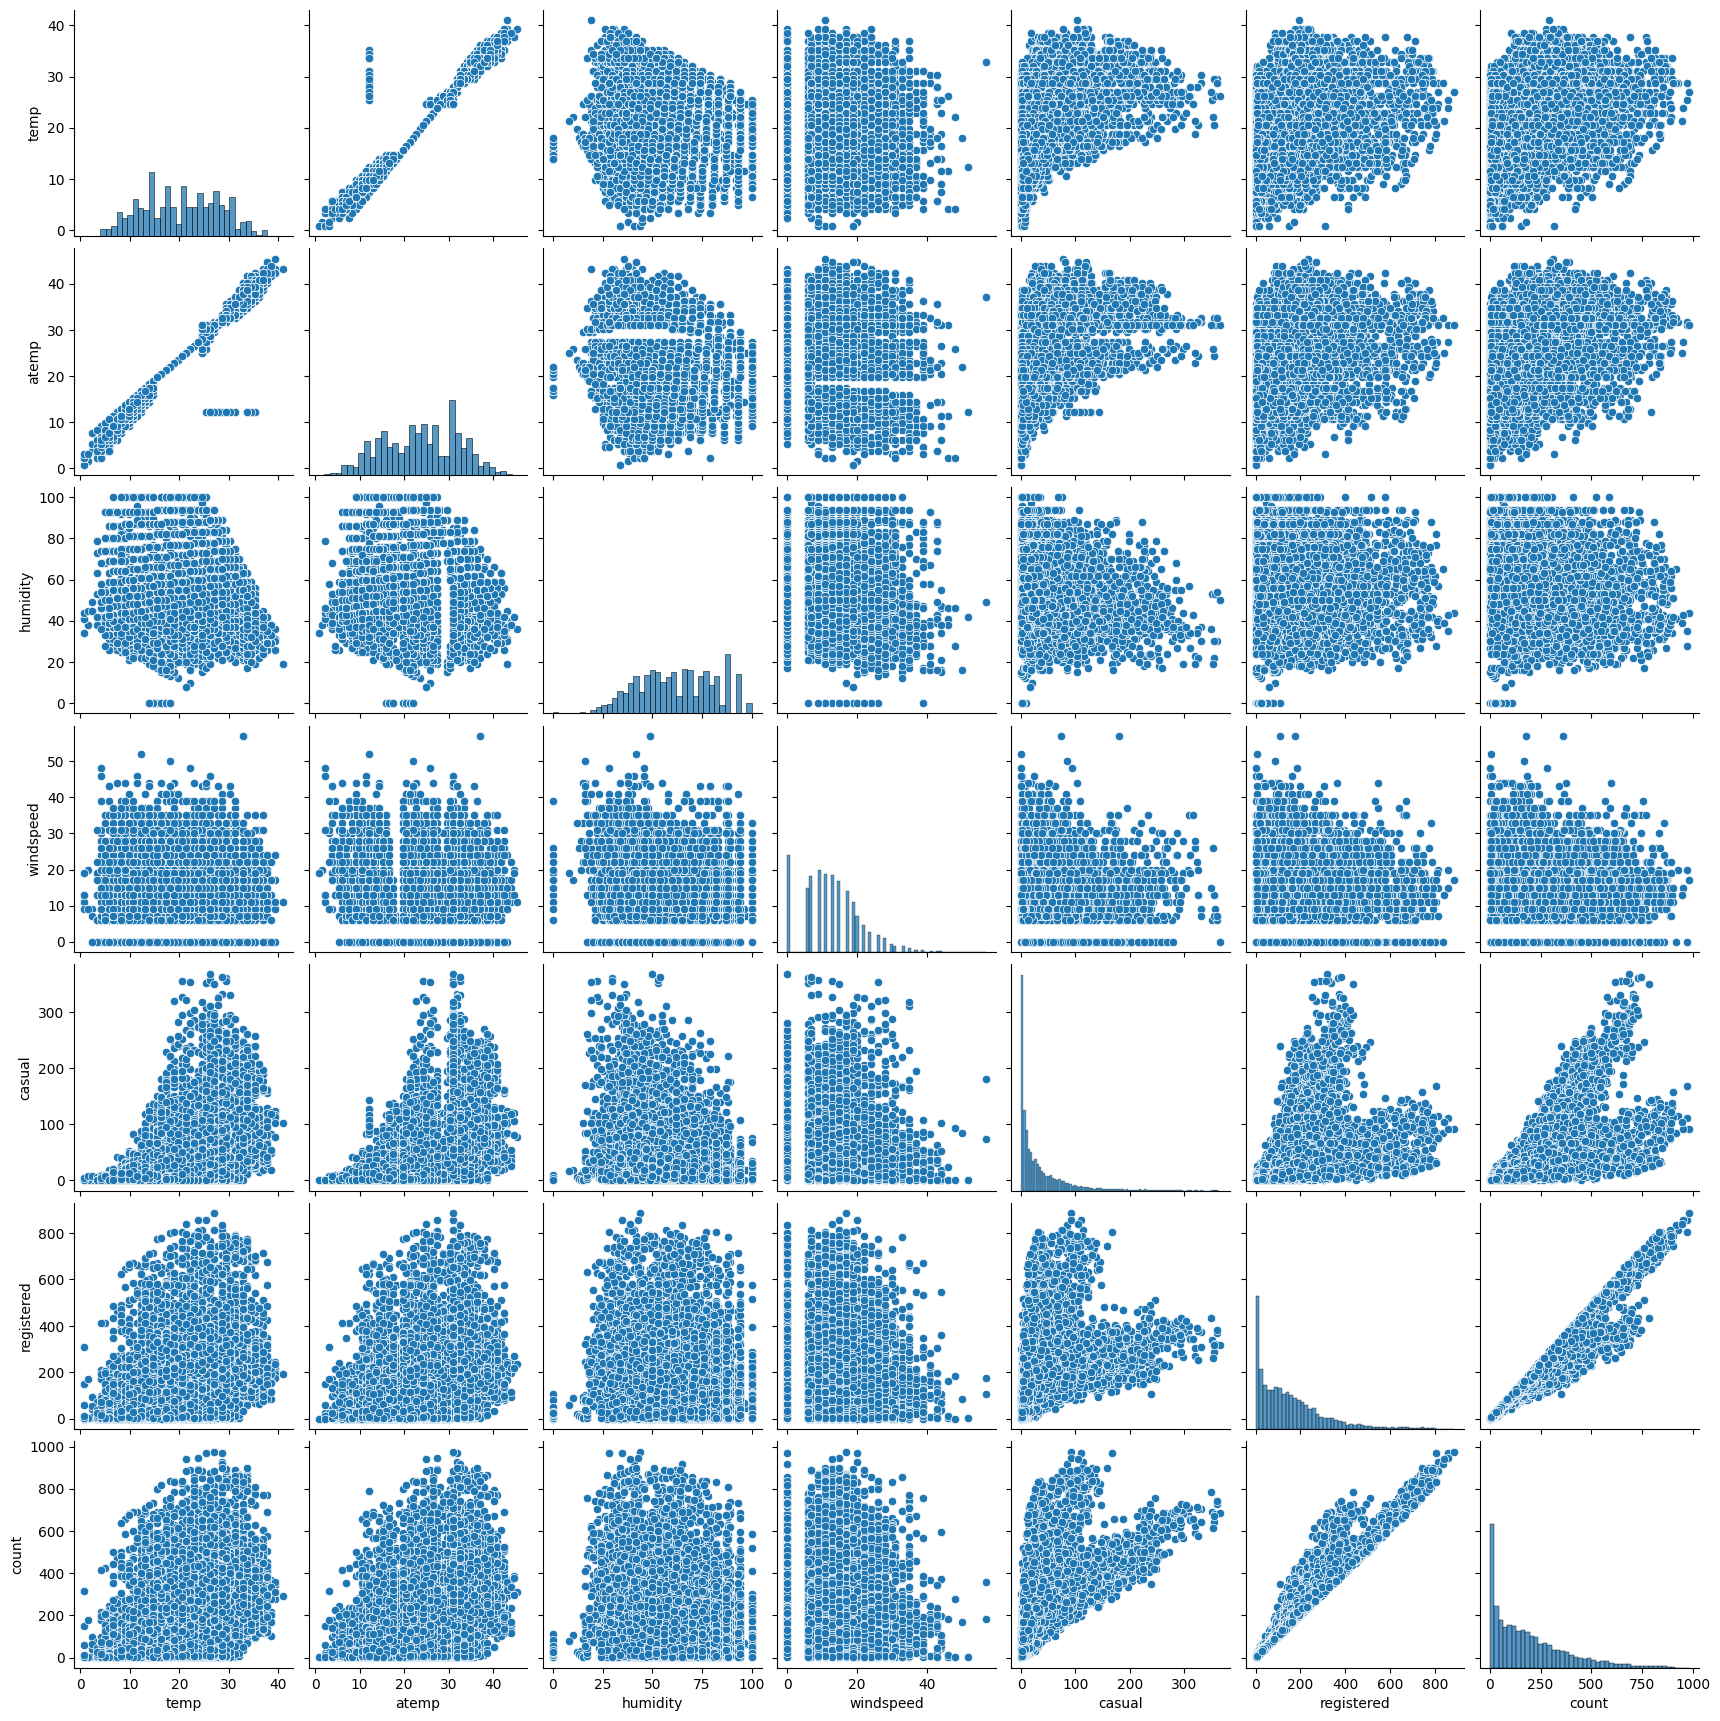

In [ ]:
sns.pairplot(df)

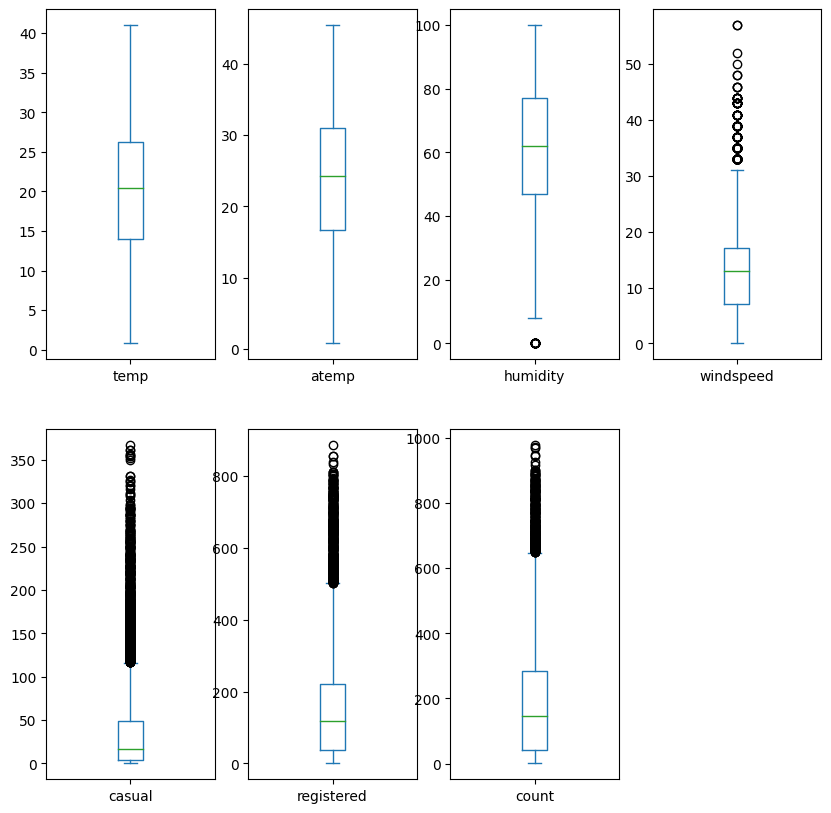

Text(0.5, 0.98, 'Outliers for all the attributes')

<Figure size 640x480 with 0 Axes>

In [ ]:
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(10,10))
plt.show()
plt.suptitle("Outliers for all the attributes")

Observation
* We observed a significant number of outliers in the casual, registered, count, and windspeed data.
* To avoid losing valuable information, we will keep these outliers.

<Axes: >

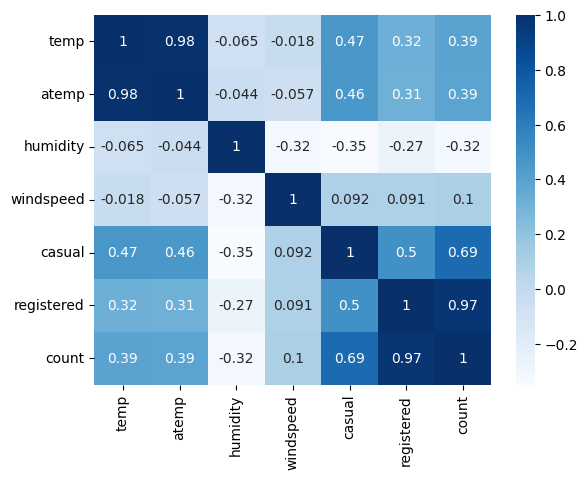

In [ ]:
c_df=df.select_dtypes(include=['number'])
c_df.corr()
sns.heatmap(c_df.corr(),annot=True,cmap='Blues')

Observations:

* We can see that "atemp" is highly correlated with "temp". We can drop the "atemp" column.
* We can see that casual and registered count are highly corelated, but will not be dropping to prevent loss of data.

In [15]:
df.drop(['atemp'],axis=1,inplace=True)

In [45]:
df['Month']=df['datetime'].dt.month_name().astype('category')
df['Day']=df['datetime'].dt.day
df['Hour']=df['datetime'].dt.hour
df["Weekday"]=df['datetime'].dt.day_name().astype('category')
df['year']=df['datetime'].dt.year
df['hour']=df['datetime'].dt.hour


In [36]:
month_per_counts= df.groupby('Month')[['casual','registered','count']].sum().reset_index()

In [37]:
months_melted=pd.melt(month_per_counts,id_vars=['Month'],var_name='Type',value_name='Count')

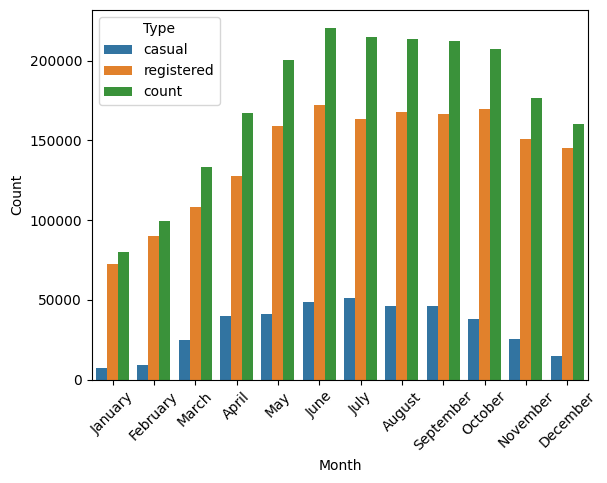

In [43]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_melted['Month'] = pd.Categorical(months_melted['Month'], categories=month_order, ordered=True)

sns.barplot(x='Month', y='Count', data=months_melted, hue='Type', order=month_order)
plt.xticks(rotation=45)
plt.show()

Observations:

* We can see that demand is high throughout June, July, August, September and October.
* After October, demand keeps dropping till January
* Demand starts increasing after from February onwards.

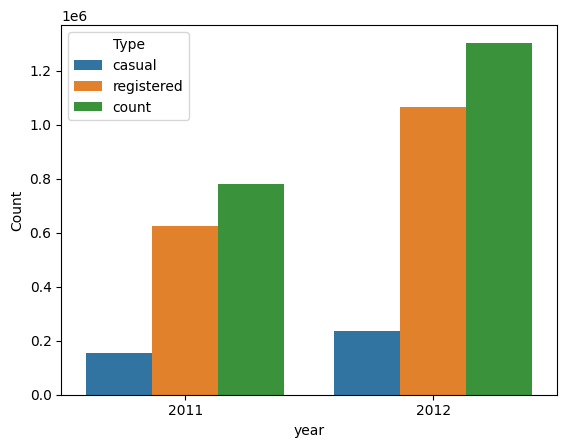

In [ ]:
year_per_counts=df.groupby('year')[['casual','registered','count']].sum().reset_index()
year_melted=pd.melt(year_per_counts,id_vars=['year'],var_name='Type',value_name='Count')
sns.barplot(x='year',y='Count',data=year_melted,hue='Type')
plt.show()

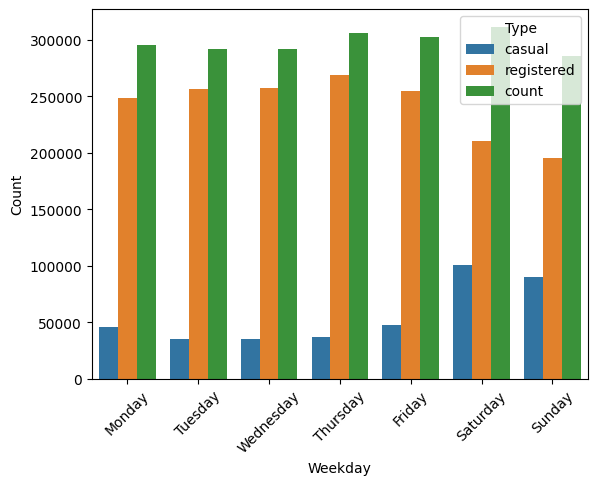

In [44]:
weekday_per_counts=df.groupby('Weekday')[['casual','registered','count']].sum().reset_index()
weekday_melted=pd.melt(weekday_per_counts,id_vars=['Weekday'],var_name='Type',value_name='Count')
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_melted['Weekday'] = pd.Categorical(weekday_melted['Weekday'], categories=weekday_order, ordered=True)
sns.barplot(x='Weekday',y='Count',data=weekday_melted,hue='Type',order=weekday_order)
plt.xticks(rotation=45)
plt.show()

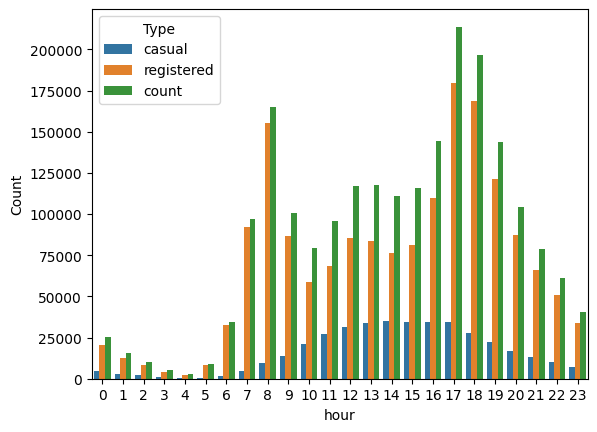

In [48]:
hour_per_counts=df.groupby('hour')[['casual','registered','count']].sum().reset_index()
hour_melted=pd.melt(hour_per_counts,id_vars=['hour'],var_name='Type',value_name='Count')
sns.barplot(x='hour',y='Count',data=hour_melted,hue='Type')
plt.show()

Observation:

* Evening time has the highest demand for bicycle rentals.
* Morning also has a high demand for bicycle rentals, though it is slightly less than in the evening.
* Afternoon time sees a medium level of demand for bicycle rentals.
* Night and late night have the lowest demand for bicycle rentals.

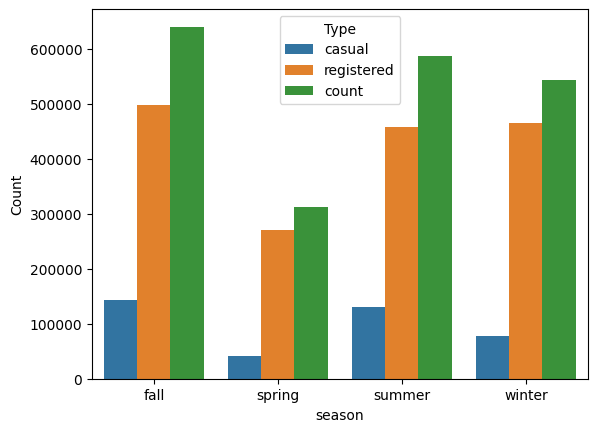

In [ ]:
season_per_counts=df.groupby('season')[['casual','registered','count']].sum().reset_index()
season_melted=pd.melt(season_per_counts,id_vars=['season'],var_name='Type',value_name='Count')
sns.barplot(x='season',y='Count',data=season_melted,hue='Type')
plt.show()

Observations

* We can see that during Fall season, high demand was observed
* Summer and Winter seasons almost had equal demand
* Spring season had the lowest demand

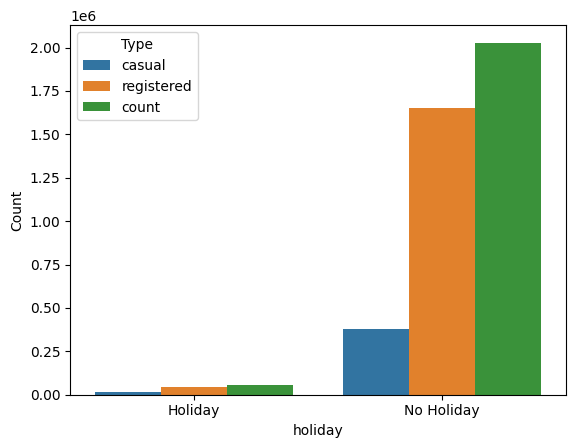

In [ ]:
holiday_per_counts=df.groupby('holiday')[['casual','registered','count']].sum().reset_index()
holiday_melted=pd.melt(holiday_per_counts,id_vars=['holiday'],var_name='Type',value_name='Count')
sns.barplot(x='holiday',y='Count',data=holiday_melted,hue='Type')
plt.show()

Onservation:

Demand is higher on Non-holiday days

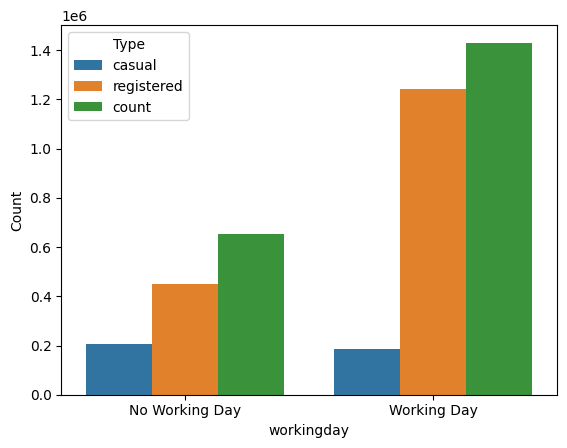

In [ ]:
workingday_per_counts=df.groupby('workingday')[['casual','registered','count']].sum().reset_index()
working_melted=pd.melt(workingday_per_counts,id_vars=['workingday'],var_name='Type',value_name='Count')
sns.barplot(x='workingday',y='Count',data=working_melted,hue='Type')
plt.show()

Observations:

* Cumulative Demand is higher on a working day.


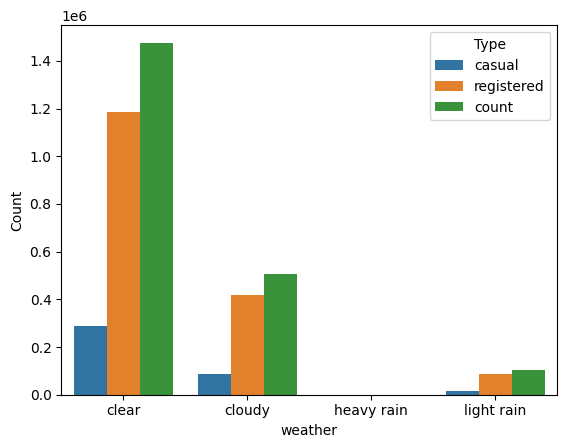

In [ ]:
weather_per_counts=df.groupby('weather')[['casual','registered','count']].sum().reset_index()
weather_melted=pd.melt(weather_per_counts,id_vars=['weather'],var_name='Type',value_name='Count')
sns.barplot(x='weather',y='Count',data=weather_melted,hue='Type')
plt.show()

Observations:

* Highest demand was observed during clear weather.
* The demand decreased as the condition of the weather decreased.

# Checking Distributions

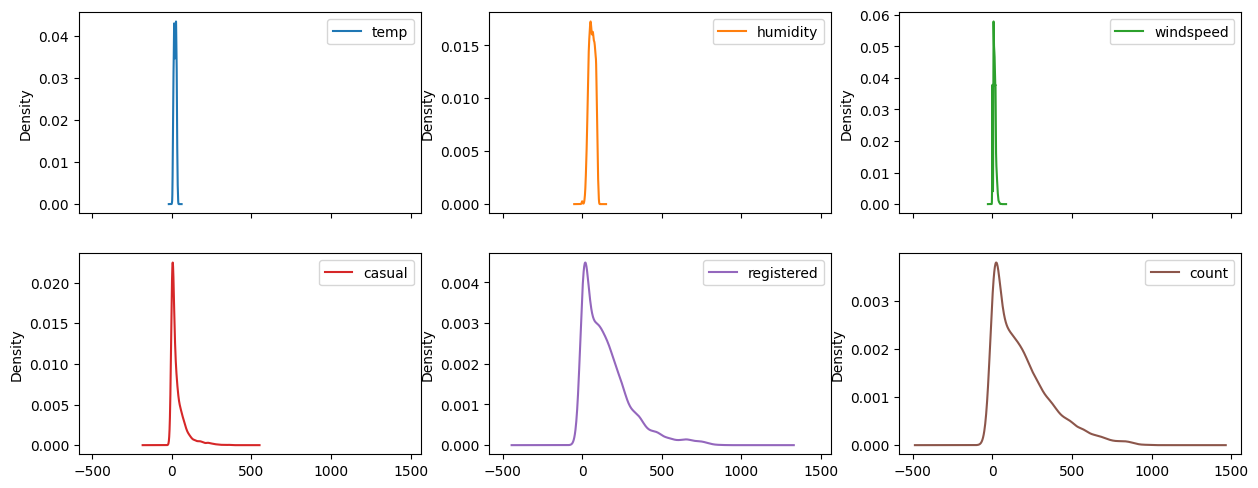

In [ ]:
df.drop(['datetime','Month','Day', 'Hour', 'Weekday', 'year'],axis=1).plot(kind='kde',subplots=True,layout=(4,3),figsize=(15,12))
plt.show()

Observation:
* Windspeed,Casual,Registered and Count are not normally distributed

<Axes: xlabel='count', ylabel='Density'>

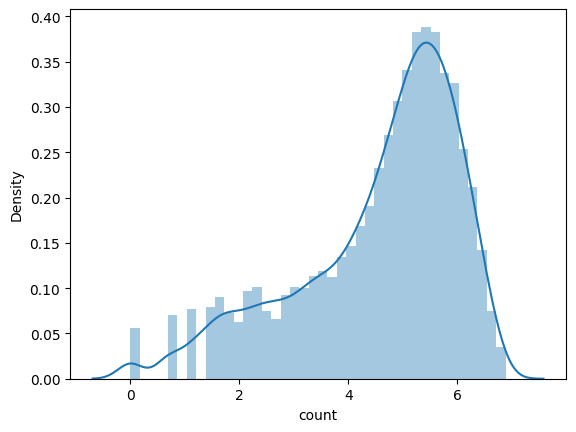

In [ ]:
# using log normal to convert skewed distribution to normal distribution
sns.distplot(np.log(df['count']))

In [ ]:
# using boxcox to convert skewed distribution to normal distribution
from scipy.stats import boxcox

transformed_data, lambda_value = boxcox(df['count'])
print("Lambda value:", lambda_value)

Lambda value: 0.3156702357923426


<Axes: ylabel='Density'>

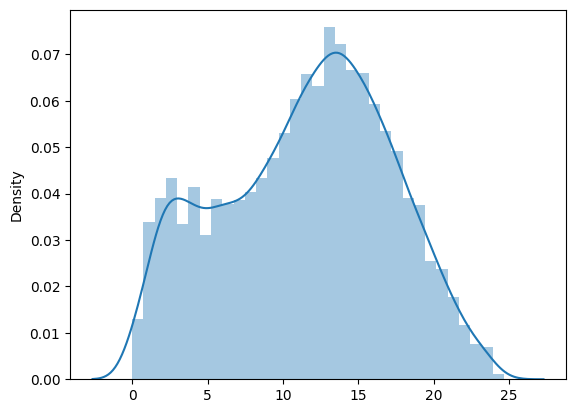

In [ ]:
sns.distplot(transformed_data)

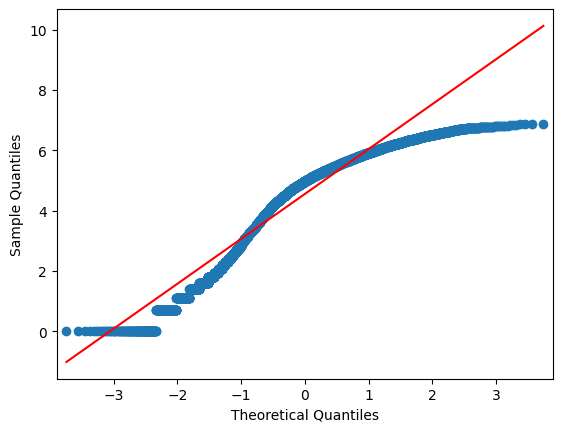

In [ ]:
# Creating a Q-Q plot of the data to check for normality
sm.qqplot(np.log(df['count']),line='s')
plt.show()

In [ ]:
# Shapiro's test to test for normality
# H0 : Data is Gaussian
# Ha : Data is not Gaussian

alpha=0.05

test_stats, p_value = shapiro(np.log(df['count']))
print("Test statistic:",test_stats)
print("p-value:",p_value)

if p_value>alpha:
  print("Data is Gaussian")
else:
  print("Data is not Gaussian")


Test statistic: 0.915410578250885
p-value: 0.0
Data is not Gaussian


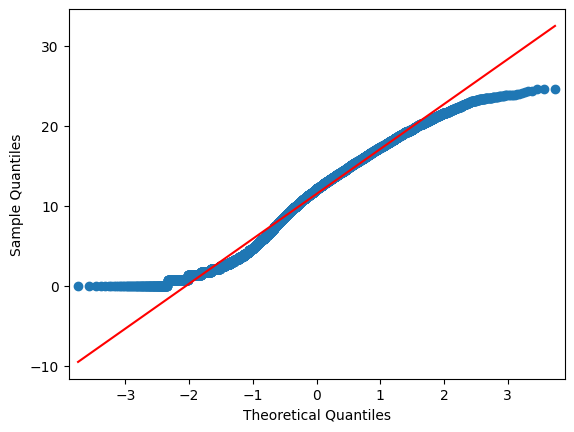

In [ ]:
sm.qqplot(transformed_data,line='s')
plt.show()

In [ ]:
# Shapiro's test to test for normality
# H0 : Data is Gaussian
# Ha : Data is not Gaussian

alpha=0.05

test_stats, p_value = shapiro(transformed_data)
print("Test statistic:",test_stats)
print("p-value:",p_value)

if p_value>alpha:
  print("Data is Gaussian")
else:
  print("Data is not Gaussian")

Test statistic: 0.9789801836013794
p-value: 4.092139486263127e-37
Data is not Gaussian


In [ ]:
df_weekday=df[(df['Weekday']!='Sunday') & (df['Weekday']!='Saturday')]

In [ ]:
df_weekend=df[(df['Weekday']=='Sunday') | (df['Weekday']=='Saturday')]

Hypothesis Testing : Check if there any significant difference between the no. of bike rides on Weekdays
and Weekends?

In [ ]:
# H0 :  there is no significant difference between the no. of bike rides on Weekdays and Weekends
# Ha :  there is significant difference between the no. of bike rides on Weekdays and Weekends

t_statistics , p_value = stats.ttest_ind(df_weekday['count'],df_weekend['count'])
print("t-statistics:",t_statistics)
print("p-value:",p_value)

if p_value<0.05:
  print("Reject H0")
else:
  print("Failed to Reject H0")

t-statistics: 1.0354386367292092
p-value: 0.30048711429228286
Failed to Reject H0


Insights

* Since the p-value is very large, we fail to reject the null hypothesis.
* This means that there is no significant difference between the no. of bike rides on Weekdays and Weekends.

Hypothesis Testing : Check if the demand of bicycles on rent is the same for different Weather
conditions?

In [ ]:
df['weather'].value_counts()

weather
clear         7192
cloudy        2834
light rain     859
heavy rain       1
Name: count, dtype: int64

In [ ]:
df_clear=df[df['weather']=='clear']['count']
df_cloudy=df[df['weather']=='cloudy']['count']
df_light_rain=df[df['weather']=='light rain']['count']
df_heavy_rain=df[df['weather']=='heavy rain']['count']

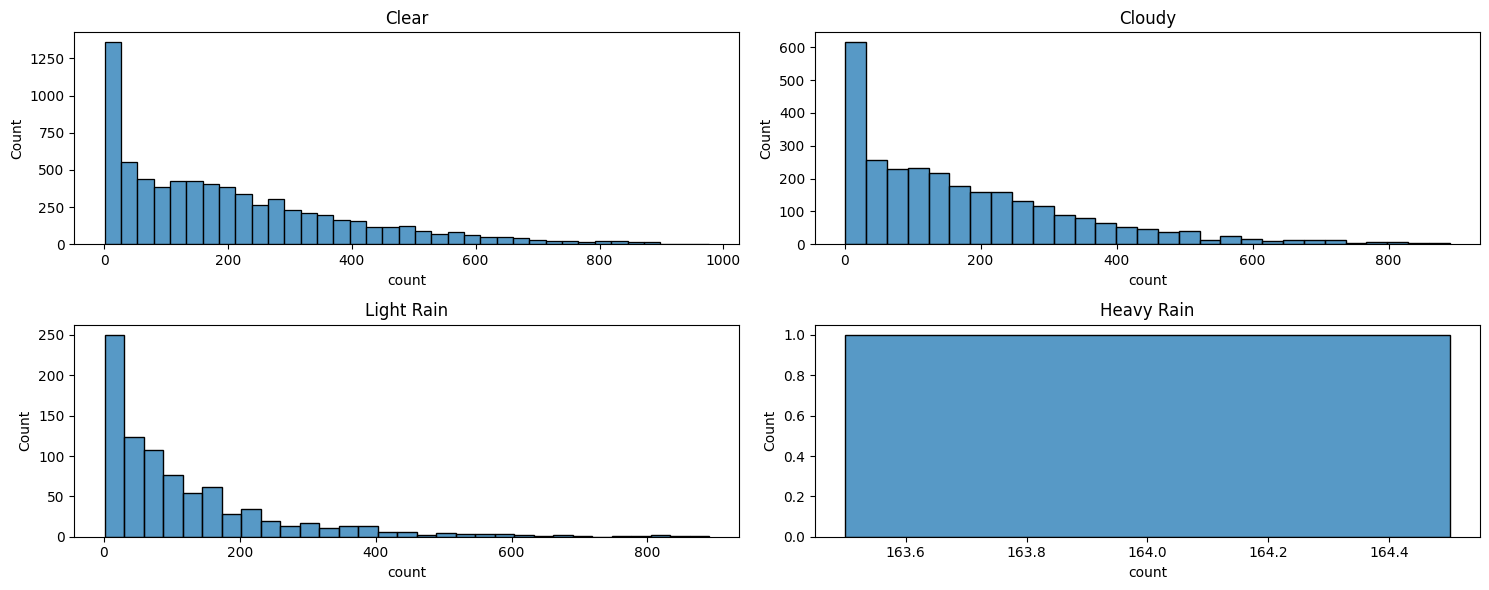

In [ ]:
plt.figure(figsize=(15,6))  # Set the figure size

plt.subplot(2, 2, 1)
sns.histplot(df_clear)
plt.title('Clear')

plt.subplot(2, 2, 2)
sns.histplot(df_cloudy)
plt.title('Cloudy')

plt.subplot(2, 2, 3)
sns.histplot(df_light_rain)
plt.title('Light Rain')

plt.subplot(2, 2, 4)
sns.histplot(df_heavy_rain)
plt.title('Heavy Rain')
plt.tight_layout()
plt.show()

Insights

From above plot we can say that the distributions are not normal

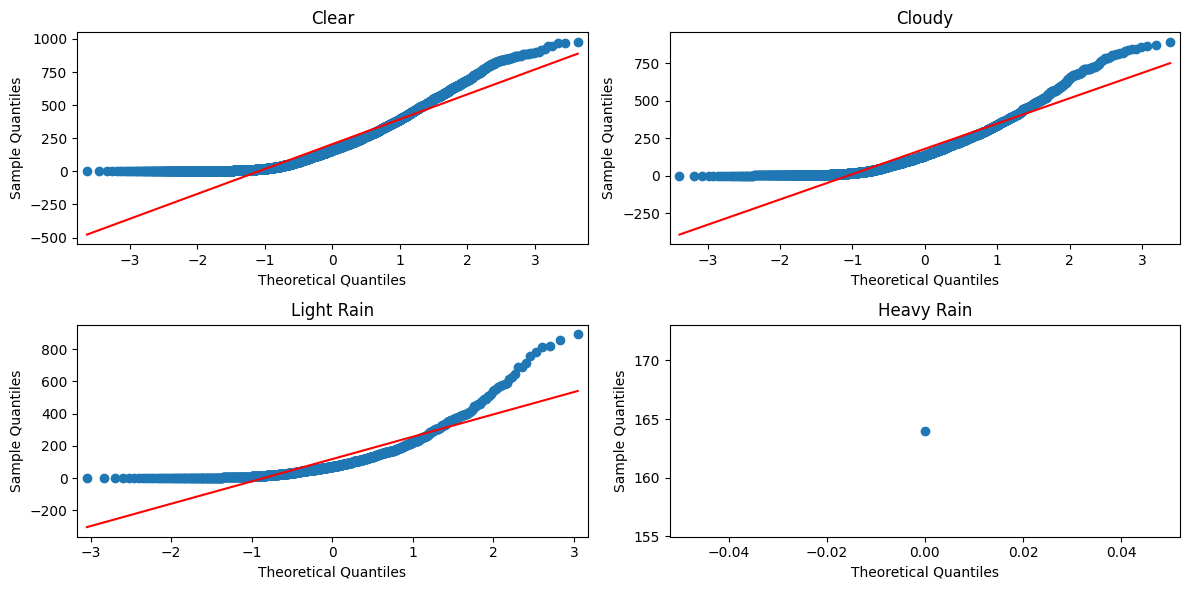

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))  # Adjusted figsize to better fit a 2x2 grid

sm.qqplot(df_clear,line="s", ax=axes[0, 0])
axes[0, 0].set_title('Clear')
sm.qqplot(df_cloudy, line="s",ax=axes[0, 1])
axes[0, 1].set_title('Cloudy')
sm.qqplot(df_light_rain, line="s",ax=axes[1,0])
axes[1, 0].set_title('Light Rain')
sm.qqplot(df_heavy_rain, line="s",ax=axes[1,1])
axes[1, 1].set_title('Heavy Rain')
plt.tight_layout()

Insights

From above plot we can say that the distributions are not normal

In [ ]:
# Shapiro-Wilk test - to check the normality of data
print(shapiro(df_clear))
print(shapiro(df_cloudy))
print(shapiro(df_light_rain))
#shapiro(df_heavy_rain)

ShapiroResult(statistic=0.8909230828285217, pvalue=0.0)
ShapiroResult(statistic=0.8767687082290649, pvalue=9.781063280987223e-43)
ShapiroResult(statistic=0.7674332857131958, pvalue=3.876090133422781e-33)


Insights

From above tests we can say that the distributions are not normal.

In [ ]:
# Levene Test -  to check the variability of data with in each group
# H0 : variance are equal
# Ha : variance are not equal
levene_test , p_value = stats.levene(df_clear, df_cloudy, df_light_rain, df_heavy_rain)
print(f"Levene_stats : {levene_test}")
print(f"P_value : {p_value}")
alpha = 0.05
if p_value < alpha:
  print("variance are not equal")
else:
  print("variance are equal")

Levene_stats : 54.85106195954556
P_value : 3.504937946833238e-35
variance are not equal


Insights

From above p value we can say that there is unequal variance between weather conditions.

In [ ]:
# Anova Test
#H0 :  All groups have same mean
#Ha :  Atleast one have the groups have different mean

f_stats , p_value = stats.f_oneway(df_clear,df_cloudy,df_light_rain,df_heavy_rain)
print("F-statistics:",f_stats)
print("p-value:",p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject H0")
else:
  print("Failed to Reject H0")

F-statistics: 65.53024112793271
p-value: 5.482069475935669e-42
Reject H0


Insights

* We can see that p value is very small. Hence we reject the null hypothesis.
* We can say that demand is dependent on different weather conditions.

In [ ]:
# Kruskal wallis test
#H0 :  All groups have same median
#Ha :  Atleast one have the groups have different median

stats, p_value= stats.kruskal(df_clear,df_cloudy,df_light_rain,df_heavy_rain)

print("F-statistics:",f_stats)
print("p-value:",p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject H0")
else:
  print("Failed to Reject H0")

F-statistics: 65.53024112793271
p-value: 3.501611300708679e-44
Reject H0


Insights

* We can see that p value is very small. Hence we reject the null hypothesis.
* We can say that demand is dependent on different weather conditions.

Hypothesis Testing - Check if the demand of bicycles on rent is the same for different Seasons?

In [ ]:
df['season'].value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

In [19]:
df_winter=df[df['season']=='winter']['count']
df_spring=df[df['season']=='spring']['count']
df_summer=df[df['season']=='summer']['count']
df_fall=df[df['season']=='fall']['count']

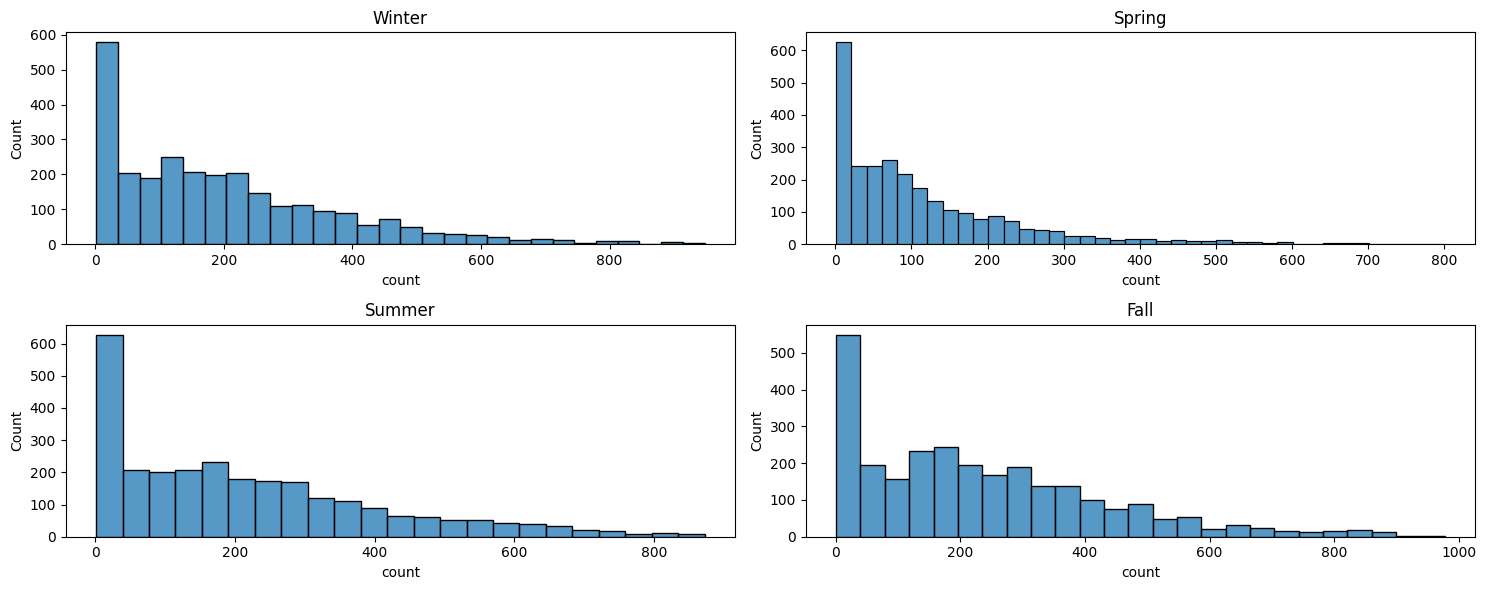

In [ ]:
plt.figure(figsize=(15, 6))  # Set the figure size

plt.subplot(2, 2, 1)
sns.histplot(df_winter)
plt.title('Winter')

plt.subplot(2, 2, 2)
sns.histplot(df_spring)
plt.title('Spring')

plt.subplot(2, 2, 3)
sns.histplot(df_summer)
plt.title('Summer')

plt.subplot(2, 2, 4)
sns.histplot(df_fall)
plt.title('Fall')
plt.tight_layout()
plt.show()

Insights

From above plot we can say that the distributions are not normal

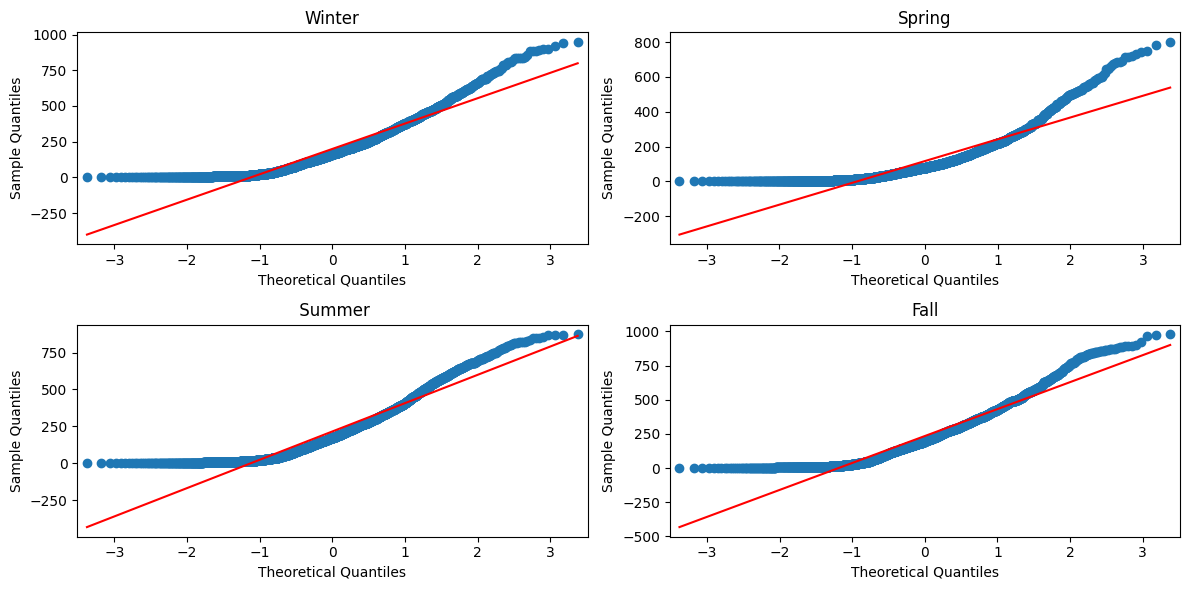

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))  # Adjusted figsize to better fit a 2x2 grid

sm.qqplot(df_winter,line="s", ax=axes[0, 0])
axes[0, 0].set_title('Winter')
sm.qqplot(df_spring, line="s",ax=axes[0, 1])
axes[0, 1].set_title('Spring')
sm.qqplot(df_summer, line="s",ax=axes[1,0])
axes[1, 0].set_title(' Summer')
sm.qqplot(df_fall, line="s",ax=axes[1,1])
axes[1, 1].set_title('Fall')
plt.tight_layout()

Insights

From above plot we can say that the distributions are not normal

In [ ]:
# Shapiro-Wilk test - to check the normality of data
print(shapiro(df_winter))
print(shapiro(df_spring))
print(shapiro(df_summer))
print(shapiro(df_fall))

ShapiroResult(statistic=0.8954644799232483, pvalue=1.1301682309549298e-39)
ShapiroResult(statistic=0.8087388873100281, pvalue=0.0)
ShapiroResult(statistic=0.900481641292572, pvalue=6.039093315091269e-39)
ShapiroResult(statistic=0.9148160815238953, pvalue=1.043458045587339e-36)


Insights

From above tests we can say that the distributions are not normal.

In [20]:
# Levene Test -  to check the variability of data with in each group
# H0 : variance are equal
# Ha : variance are not equal
levene_test , p_value = stats.levene(df_winter, df_spring, df_summer, df_fall)
print(f"Levene_stats : {levene_test}")
print(f"P_value : {p_value}")
alpha = 0.05
if p_value < alpha:
  print("variance are not equal")
else:
  print("variance are equal")

Levene_stats : 187.7706624026276
P_value : 1.0147116860043298e-118
variance are not equal


In [21]:
# Anova Test
#H0 :  All groups have same mean
#Ha :  Atleast one have the groups have different mean

f_stats , p_value = stats.f_oneway(df_winter,df_spring,df_summer,df_fall)
print("F-statistics:",f_stats)
print("p-value:",p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject H0")
else:
  print("Failed to Reject H0")

F-statistics: 236.94671081032104
p-value: 6.164843386499654e-149
Reject H0


Insights

* We can see that p value is very small. Hence we reject the null hypothesis.
* We can say that demand is dependent on different Seasons.

In [22]:
# Kruskal wallis test
#H0 :  All groups have same median
#Ha :  Atleast one have the groups have different median

stats, p_value= stats.kruskal(df_winter,df_spring,df_summer,df_fall)

print("F-statistics:",f_stats)
print("p-value:",p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject H0")
else:
  print("Failed to Reject H0")

F-statistics: 236.94671081032104
p-value: 2.479008372608633e-151
Reject H0


Insights

* We can see that p value is very small. Hence we reject the null hypothesis.
* We can say that demand is dependent on different Seasons.

Hypothesis Testing : Check if the Weather conditions are significantly different during different Seasons?

In [26]:
value=pd.crosstab(df['weather'],df['season'])
value

season      fall  spring  summer  winter
weather                                 
clear       1930    1759    1801    1702
cloudy       604     715     708     807
heavy rain     0       1       0       0
light rain   199     211     224     225

In [28]:
# Chi-square test

# H0 :  Weather conditions are independent of Seasons
# Ha :  Weather conditions are dependent on Seasons

from scipy.stats import chi2_contingency

chi_stat,p_value,DOF,exp_freq = chi2_contingency(value)

print(f"Chi_Statistcs: {chi_stat}")
print(f"P_Value: {p_value}")
print(f"Degree of Freedom: {DOF}")
print(f"Expected_Value: {exp_freq}")

alpha = 0.05

if p_value < alpha:
  print("Reject H0")
else:
  print("Failed to Reject H0")

Chi_Statistcs: 49.15865559689363
P_Value: 1.5499250736864862e-07
Degree of Freedom: 9
Expected_Value: [[1.80559765e+03 1.77454639e+03 1.80559765e+03 1.80625831e+03]
 [7.11493845e+02 6.99258130e+02 7.11493845e+02 7.11754180e+02]
 [2.51056403e-01 2.46738931e-01 2.51056403e-01 2.51148264e-01]
 [2.15657450e+02 2.11948742e+02 2.15657450e+02 2.15736359e+02]]
Reject H0


Insights

* The p value is very small and less than alpha. Hence we reject the null hypothesis.
* We can conclude that Weather and Season are dependant.

# Insights:

Demand Factors:
* Working day or holiday status does not significantly affect demand.
* Casual users increase on weekends.
* Weather and season are major contributors to demand changes.
* Clear weather has the highest demand; light rain or snow has the lowest.
* Fall, summer, and winter seasons see higher demand; spring sees the lowest.
* Humidity is not a significant factor in demand changes.
* Temperature significantly impacts demand: as temperature increases, demand on rental bike increases.
* Wind speed is a minor factor.
* Time of day has a minor impact: evening has the highest demand, followed by morning and afternoon; nights and late nights have the lowest demand.

Data Characteristics:
* Variables "temp," "atemp," and "humidity" follow a normal distribution.
* Outliers are present in "humidity," "casual," "registered," and "count."

Seasonal and Weather Impact:
* ANOVA tests confirm higher rentals in summer and fall, and significantly lower in spring.
* Rentals decrease during rainy, thunderstorm, snowy, and foggy conditions.

Correlation Insights:
* Positive correlation between "count" and "registered," as well as "count" and "casual."
* Positive correlation between "count" and "temp"/"atemp."
* Negative correlation between "count" and humidity.
* "Count," "registered," and "casual" follow a log-normal distribution.

Yearly and Monthly Trends:
* Rentals increased significantly from 2011 to 2012.
* June has the highest rentals; January has the least.
* Rentals are lowest on snowy days and highest on clear days.

Statistical Tests:
* 2-sample t-test shows "Working Day" does not significantly impact rental counts.
* ANOVA indicates significant impact of weather on rental counts, with clear weather having the highest rentals.
* ANOVA also shows significant impact of seasons on rental counts, with fall having the highest and spring the lowest.
* Chi-square test confirms weather dependency on the season.


# Recommendations:

* Convert Casual Users to Registered Users: Offer discounts to casual users who sign up during weekends to increase the number of registered users.

* Optimize Bicycle Deployment: Adjust the number of bicycles on the road based on demand to reduce maintenance and operational costs. Specifically, decrease the number of bicycles during the spring season and increase them during summer, fall, and winter seasons.

* Attract More Casual Users: Implement marketing strategies such as first-time user discounts, referral bonuses, and other incentives. Focus on attracting more customers on working days by positioning Yulu as an alternative mode of transport for commuting to work.

* Peak Business Hours Offers: Offer special promotions during peak hours to attract more customers. Consider weather and seasonal conditions when planning marketing and operations, introducing user-friendly features for specific weather conditions, and using customer profiling to tailor offerings.

* Seasonal Offers: Introduce seasonal promotions to attract new customer bases, such as student discounts during the summer or targeting school hours to cater to students.